In [141]:
import numpy as np
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import datetime

In [142]:
def download_data(stock, start_date, end_date):
    data = pd.DataFrame()
    ticker = yf.download(stock, start_date, end_date)
    # ticker has lot of columns, reset_index and accept the adjusted close values
    data[stock] = ticker['Adj Close']
    return data

In [143]:
# notes on PPF
# for 95% confidence interval, area under the curve is 95%,
# we are trying to find value on x-axis (z score) that corresponds with area under the curve 0.05

In [162]:
def calculate_VaR_tomorrow(position, confidence_level, mu, sigma):
    v = norm.ppf(1 - confidence_level)

    # value at risk tomorrow, without n, or n = 1
    var = position * (mu - sigma*v)
    return var

In [155]:
# var for any days in future

In [158]:
def calculate_VaR(position, confidence_level, mu, sigma, no_of_days):
    v = norm.ppf(1 - confidence_level)

    # value at risk tomorrow, without n, or n = 1
    var = position * (mu*no_of_days - sigma*v*np.sqrt(no_of_days))
    return var

[*********************100%***********************]  1 of 1 completed

value at risk tomorrow is : 3.1005165083771877
value at risk after 10 number of days is 10.428020400027153 
            0
0    3.100517
1    4.438193
2    5.485838
3    6.383353
4    7.184926
..        ...
95  38.236906
96  38.481238
97  38.724784
98  38.967553
99  39.209559

[100 rows x 1 columns]


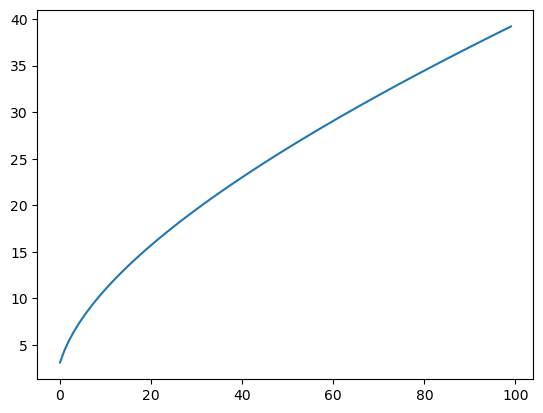

In [177]:
if __name__ == '__main__':
    stock_data = []
    start = datetime.datetime(2015,1,1)
    end = datetime.datetime(2024,1,1)

    
    stock_data = download_data('AAPL', start, end)
    # print(stock_data)

    # calculate log of daily returns
    stock_data['returns'] = np.log(stock_data['AAPL'] / stock_data['AAPL'].shift(1))
    # start with second row and assignt to initial DF
    stock_data = stock_data[1:]
    
    # below plot will look like white noise
    # plt.plot(stock_data)
    # below plot will look like normally distributed
    # a = plt.hist(stock_data, bins = 100, density = True, alpha = 0.6, color = 'blue')
    # plt.show()

    # assumption is that stock returns data is normally distributed    
    mu = np.mean(stock_data['returns'])
    sigma = np.std(stock_data['returns'])

    # initialize other variables
    # value of investment
    investment = 100
    # confidence level 
    confidence_level = 0.95
    # no of days
    no_of_days = 10

    # generate value at risk for tomorrow
    VaR_Output = calculate_VaR_tomorrow(investment, confidence_level, mu, sigma)
    print("value at risk tomorrow is : {}".format(VaR_Output))

    # generate value at risk for 'no_of_days'
    VaR_Output = calculate_VaR(investment, confidence_level, mu, sigma, no_of_days)
    print("value at risk after {} number of days is {} ".format(no_of_days, VaR_Output))

    results = pd.DataFrame([calculate_VaR(investment, confidence_level, mu, sigma, no_of_days) for no_of_days in range(1,101)])
    print(results)

    plt.plot(results)

    # with 99% confidence interval the VaR increases, 
    # since you are looking at more extreme scenarios with lower probability of occurence.
        

# appendix

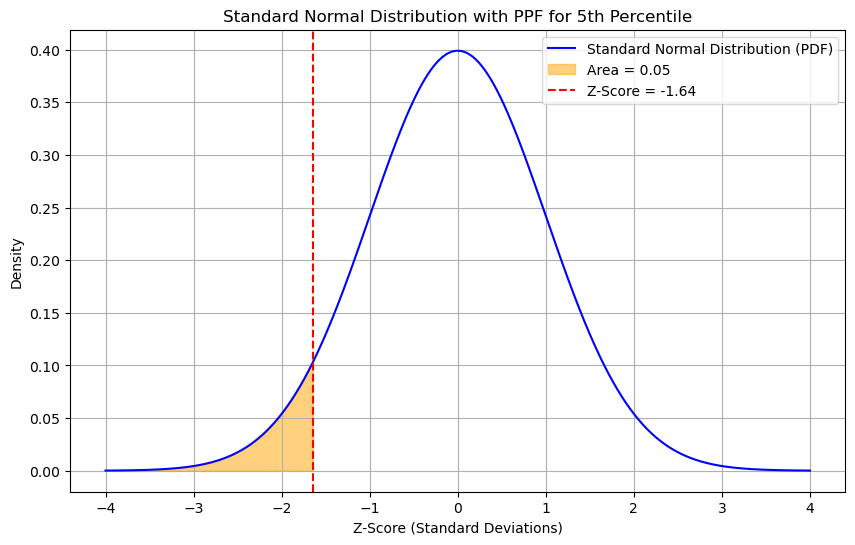

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculate the z-score for the 5th percentile
quantile = 0.05
z_score = norm.ppf(quantile)

# Generate x values and PDF
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x)

# Plot the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Standard Normal Distribution (PDF)", color='blue')

# Highlight the area under the curve for P(X ≤ z)
x_fill = np.linspace(-4, z_score, 100)
plt.fill_between(x_fill, norm.pdf(x_fill), color='orange', alpha=0.5, label="Area = 0.05")

# Add labels and annotations
plt.title("Standard Normal Distribution with PPF for 5th Percentile")
plt.xlabel("Z-Score (Standard Deviations)")
plt.ylabel("Density")
plt.axvline(z_score, color='red', linestyle='--', label=f"Z-Score = {z_score:.2f}")
plt.legend()

# Show the plot
plt.grid()
plt.show()
